# Getting Started with the Tavily `/crawl` Endpoint 🌐
---

Web crawling is the process of automatically navigating through websites by following hyperlinks to discover numerous web pages and URLs. For autonomous web agents, this capability is essential for accessing deep web data which might be difficult to retrieve via search.Combined with our `/search` and `/extract` endpoints, developers can build customized agents that navigate the web intelligently.

Tavily’s `/crawl` endpoint seamlessly integrates crawling and scraping capabilities with the following features:

1. **Reliability:** Bypasses website blocking mechanisms.
2. **URL Discovery:** Identifies links via sitemap parsing and page traversal.
3. **Recursive Navigation:** Balances breadth-first and depth-first search to explore nested pages efficiently.
4. **Content Extraction:** Captures content from both dynamic and static web pages.
5. **Customizable:** Users can define crawl scope and intent for tailored results.


To get started:

1. Sign up at [app.tavily.com](https://app.tavily.com/home) and copy your API key from your account dashboard
2. Save the key as an environment variable in a `.env` file

In [1]:
import requests
import os
import getpass

if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = getpass.getpass("TAVILY_API_KEY:\n")

TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

## Tavily Crawl API Parameters

| Parameter         | Type     | Required | Description                                                                                             | Default  |
|------------------|----------|----------|---------------------------------------------------------------------------------------------------------|----------|
| `url`       | string   | ✅ Yes    | The root URL to begin the crawl.                                                                        | —        |
| `max_depth`      | integer  | No       | Max depth of the crawl. Defines how far from the base URL the crawler can explore.                 | `1`      |
| `max_breadth`    | integer  | No       | Max number of links to follow **per level** of the tree (i.e., per page).                               | `20`     |
| `limit`      | integer  | No       | Total number of links the crawler will process before stopping.                                         | `50`     |
| `query`      | string   | No       | Natural language instructions for the crawler                                                           |     —    |
| `select_paths`   | array of strings    | No       | **Regex patterns** to select only URLs with specific path patterns (e.g., `/docs/.*`, `/api/v1.*`).     | `null`   |
| `select_domains` | array of strings    | No       | **Regex patterns** to select crawling to specific domains or subdomains (e.g., `^docs\.example\.com$`). | `null`   |
| `allow_external` | boolean  | No       | Whether to allow following links that go to external domains.                                           | `false`  |
| `categories`     | array of strings    | No       | Filter URLs using predefined categories like `documentation`, `blog`, `api`, etc.                       | `null`   |
| `extract_depth`  | string   | No       | Advanced extraction retrieves more data, including tables and embedded content, with higher success but may increase latency. Options: `"basic"` or `"advanced"`.                                 | `"basic"`|


We will explain each parameter in detail as we go through this notebook

### Define the Target Website

We'll specify the base URL to crawl. For this example, we're using `tavily.com`. Let's keep it really simple with `max_depth` set to 1.

---

Exerimentation


---

In [6]:
crawl_result = requests.post(
    "https://api.tavily.com/crawl",
    headers={"Authorization": f"Bearer {TAVILY_API_KEY}"},
    json={
        "url": "https://github.com/langchain-ai/langchain",
        "limit": 20,
        "max_depth": 2,
        "max_breadth": 20,
        "extract_depth": "basic"
    },
)

In [7]:
for page in crawl_result.json()["results"]:
    print(page["url"])
    #print(page["raw_content"])


https://github.com/langchain-ai/langchain
https://github.com/dev2049
https://github.com/cbornet
https://github.com/jacoblee93
https://github.com/pricing
https://github.com/topics
https://github.com/nfcampos
https://github.com/hinthornw
https://github.com/features
https://github.com/langchain-ai/langchain/releases
https://github.com/vowelparrot
https://github.com/premium-support
https://github.com/langchain-ai/langchain/actions
https://github.com/ccurme
https://github.com/langchain-ai/langchain/discussions
https://github.com/security
https://github.com/langchain-ai/langchain/pulse
https://github.com/langchain-ai/langchain/stargazers
https://github.com/baskaryan
https://github.com/langchain-ai




---

In [8]:
base_url = "https://tavily.com/"

In [9]:
crawl_result = requests.post(
    "https://api.tavily.com/crawl",
    headers={"Authorization": f"Bearer {TAVILY_API_KEY}"},
    json={
        "url": base_url,
        "limit": 50,
        "max_depth": 1,
        "max_breadth": 50,
        "extract_depth": "advanced",
    },
)

In [10]:
for page in crawl_result.json()["results"]:
    print(page["url"])

https://tavily.com/
https://tavily.com/terms
https://tavily.com/privacy
https://tavily.com/enterprise
https://trust.tavily.com/
https://blog.tavily.com/
https://status.tavily.com/
https://community.tavily.com/
https://app.tavily.com/playground
https://app.tavily.com/use-cases
https://app.tavily.com/home


### API Response Format

The crawler returns a standardized API response format with the following structure:

---

In [11]:
crawl_result.json()

{'base_url': 'https://tavily.com/',
 'results': [{'url': 'https://tavily.com/',
   'raw_content': 'Tavily\n\n[](/tavily-hero.mp4)\n\n[![Tavily](./images/logo.svg)](/)\n\n[Features](/#features)[Pricing](/#pricing)[FAQ](/#faq)[Use Cases](https://app.tavily.com/use-cases)[Docs](https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started)[Community](https://community.tavily.com)[Blog](https://blog.tavily.com)\n\n[Operational](https://status.tavily.com/)\n\n[Log In](https://app.tavily.com/home)[Sign Up](https://app.tavily.com/home)\n\n[![Tavily](./images/logo.svg)](/)\n\n[Features](#)[Pricing](#)[FAQ](#)[Use Cases](https://app.tavily.com/use-cases)[Docs](https://docs.tavily.com/)[Community](https://community.tavily.com/)[Blog](https://blog.tavily.com/)\n\n[Operational](https://status.tavily.com/)\n\n[Log In](https://app.tavily.com/home)[Sign Up](https://app.tavily.com/home)\n\n# Connect Your LLM to the Web\n\nEmpowering your AI applications with real-time,   \n accurate search res

The result is a dictionary with the following keys:

In [12]:
crawl_result.json().keys()

dict_keys(['base_url', 'results', 'response_time'])

First, we are interested in the status of the crawl job:


In [ ]:
crawl_result.json()["success"]

Let's view some key metadata such as number of pages crawled and total credits used. 

In [ ]:
crawl_result.json()["metadata"]

Let's view the data for one of the crawled pages

In [ ]:
crawl_result.json()["results"][0]["raw_content"]

As you can see, we've combined the crawl and extract functionlity into the crawl endpoint, allowing for seemless discovery of URLs and their associated raw content. 

### Crawl Depth and Breadth Visualization

---

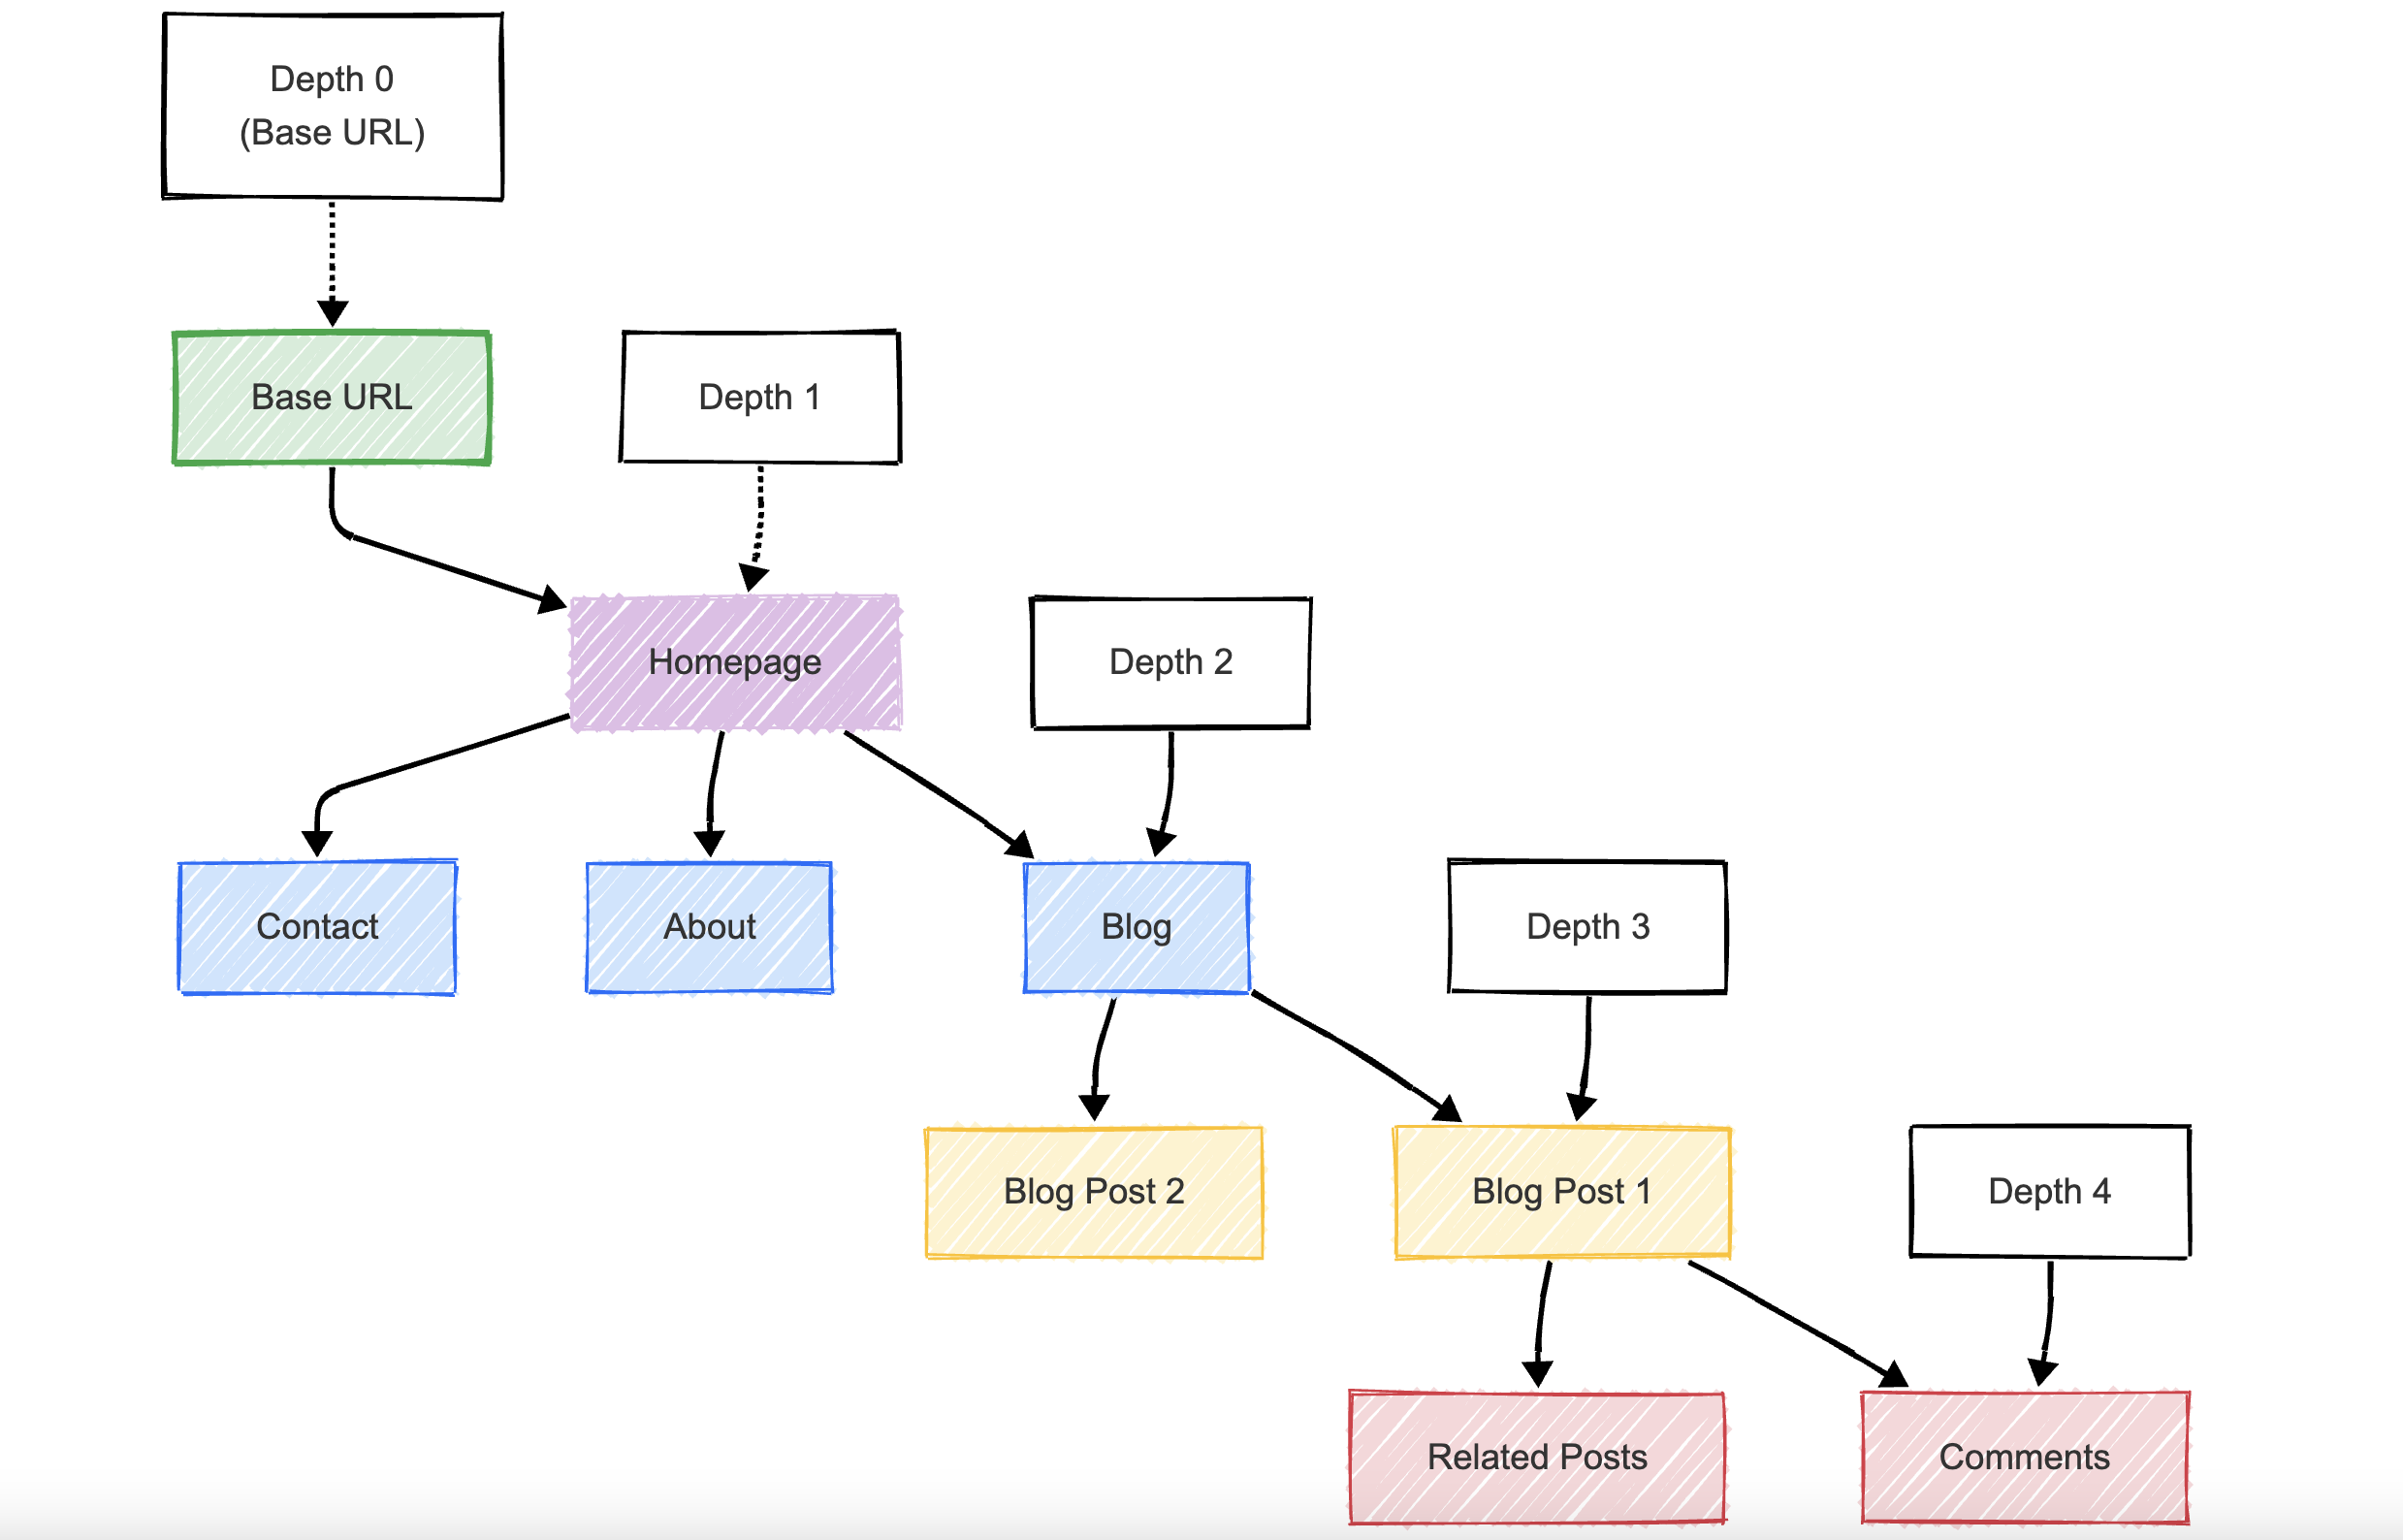

In [13]:
from IPython.display import Image

Image("../assets/breadth-depth.png", width=500)

In this example, If `max_breadth = 2`, the crawler will only reach 2 of the blue nodes. If `max_depth = 3`, then the crawler will reach at maximum the yellow level.

#### BFS Depth vs. File Tree Depth
It's important to note that Tavily uses a BFS methodology -- not File Tree depth.

- **BFS Depth:**
  Refers to the number of link hops from the root URL. A page directly linked from the root is at BFS depth 1, regardless of its URL structure.

- **File Tree Depth:**
  Indicates the actual nesting level of a file in the URL or directory structure (e.g., /a/b/c/d/e/page.html has a file tree depth of 5).

- **Key Point:**
  A page at BFS depth 1 can reside 5 levels deep in the file tree if its URL is directly linked from the root. The crawler's settings are based on BFS depth, not file tree depth.

### Deeper Crawl

Now, lets see it action...set `max_depth` to 2.

---

In [9]:
deep_crawl_result = requests.post(
    "https://api.tavily.com/crawl",
    headers={"Authorization": f"Bearer {TAVILY_API_KEY}"},
    json={
        "url": base_url,
        "limit": 100,
        "max_depth": 2,
        "max_breadth": 100,
        "extract_depth": "advanced",
    },
)

In [ ]:
deep_crawl_result.json()["metadata"]

Let's view all the links we crawled. What do you notice?

In [ ]:
for page in deep_crawl_result.json()["results"]:
    print(page["url"])

As you can see, we do a breadth-first crawl.


### URL Control
Apart from scraping configurations, you have two options to select URL patterns during crawling:

- `catagories`: Semantically filters URLs by predefined category. Only URLs matching these categories will be included.
- `select_paths`: Filters by domain name using regex. Only matching domains will be included.
- `select_domains`: Filters by URL path using regex. Only matching paths within the selected domains will be included.

The `select_paths` and `select_domains` parameters allow you to filter specific URLs using regular expressions (regex). This gives you fine-grained control over which content gets processed.

Still confused about the difference between a `domain` and a `path`? Let's explore an example to find out...

### Using Category Selections

Category selections allow you to limit the crawler to specific sections of a website using semantic filtering. 
Experiment with the supported Category values:
  - `"Careers"`
  - `"Blog"`
  - `"Documentation"`
  - `"About"`
  - `"Pricing"`
  - `"Community"`
  - `"Developers"`
  - `"Contact"`

---

In [16]:
select_paths_crawl_result = requests.post(
    "https://api.tavily.com/crawl",
    headers={"Authorization": f"Bearer {TAVILY_API_KEY}"},
    json={
        "url": base_url,
        "limit": 50,
        "max_depth": 1,
        "max_breadth": 50,
        "extract_depth": "advanced",
        "categories": ["Developers"],
    },
)

In [ ]:
for page in select_paths_crawl_result.json()["results"]:
    print(page["url"])

### Using Path Selections

Path selections allow you to limit the crawler to specific sections of a website. For example:

---

In [32]:
select_paths_crawl_result = requests.post(
    "https://api.tavily.com/crawl",
    headers={"Authorization": f"Bearer {TAVILY_API_KEY}"},
    json={
        "url": base_url,
        "limit": 100,
        "max_depth": 1,
        "max_breadth": 100,
        "extract_depth": "advanced",
        "select_paths": ["/documentation/*", "/api-reference/*"],
    },
)

In [ ]:
for page in select_paths_crawl_result.json()["results"]:
    print(page["url"])

This will only crawl URLs whose paths start with `/documentation/` OR `/api-reference/`.

### Using Domain Selections

Domain selections allow you to limit the crawler to specific domains or subdomains. For example:

---

In [47]:
select_domains_crawl_result = requests.post(
    "https://api.tavily.com/crawl",
    headers={"Authorization": f"Bearer {TAVILY_API_KEY}"},
    json={
        "url": "https://tavily.com",
        "limit": 50,
        "max_depth": 1,
        "max_breadth": 50,
        "extract_depth": "advanced",
        "select_domains": ["docs", "blog"]
    },
)

print(select_domains_crawl_result.json())

{'base_url': 'https://tavily.com', 'results': [{'url': 'https://tavily.com/', 'raw_content': 'Tavily\n\n[](/tavily-hero.mp4)\n\n[![Tavily](./images/logo.svg)](/)\n\n[Features](/#features)[Pricing](/#pricing)[FAQ](/#faq)[Use Cases](https://app.tavily.com/use-cases)[Docs](https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started)[Community](https://community.tavily.com)[Blog](https://blog.tavily.com)\n\n[Operational](https://status.tavily.com/)\n\n[Log In](https://app.tavily.com/home)[Sign Up](https://app.tavily.com/home)\n\n[![Tavily](./images/logo.svg)](/)\n\n[Features](#)[Pricing](#)[FAQ](#)[Use Cases](https://app.tavily.com/use-cases)[Docs](https://docs.tavily.com/)[Community](https://community.tavily.com/)[Blog](https://blog.tavily.com/)\n\n[Operational](https://status.tavily.com/)\n\n[Log In](https://app.tavily.com/home)[Sign Up](https://app.tavily.com/home)\n\n# Connect Your LLM to the Web\n\nEmpowering your AI applications with real-time,   \n accurate search results 

In [48]:
for page in select_domains_crawl_result.json()["results"]:
    print(page["url"])

https://tavily.com/
https://blog.tavily.com/
https://docs.tavily.com/
https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started


This will only crawl URLs with the domains `docs.tavily.com` OR `blog.tavily.com`.



### Combined Selections

You can combine path and domain selections for more targeted crawling.

---

In [ ]:
combined_crawl_result = requests.post(
    "https://api.tavily.com/crawl",
    headers={"Authorization": f"Bearer {TAVILY_API_KEY}"},
    json={
        "url": "docs.tavily.com",
        "limit": 50,
        "max_depth": 1,
        "max_breadth": 50,
        "extract_depth": "advanced",
        "select_paths": ["/documentation/*", "/api-reference/*"]
    }
)
print(combined_crawl_result.json())

This will only crawl URLs whose paths start with (`/documentation/` OR `/api-reference/`)


In [54]:
for page in combined_crawl_result.json()["results"]:
    print(page["url"])

https://tavily.com/


### Performance & Limits

The `limit` parameter plays a crucial role in managing web crawling scope. It defines the maximum number of pages to be scraped, which becomes especially valuable when dealing with extensive websites or when following external links. If not specified, the crawler might endlessly navigate through interconnected pages, wasting resources and processing time.

---

## Next Steps

Looking for more inspiration? Check out our related notebooks:

1. [RAG Crawl: Building a Knowledge Base with Web Crawling](./crawl-rag.ipynb)
2. [Agentic Crawling: Making Autonomous Web Crawlers](./agentic-crawl.ipynb)
